In [2]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d # 3D 그래프 그리는 라이브러리
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [3]:
bst = load_boston()
bstDF = pd.DataFrame(bst.data, columns = bst.feature_names)
print(bstDF.shape)
# 506개의 정보, feature 13개 

(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
bstDF.head() # 데이터 5개를 볼 수 있다

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bstDF1 = bstDF[['RM','PTRATIO']] # 거주할 수 있는 방 개수, 지역의 교사와 학생수 개수
print(bstDF1.shape)
bstDF1.head()


(506, 2)


,RM,PTRATIO
0,6.575,15.3
1,6.421,17.8
2,7.185,17.8
3,6.998,18.7
4,7.147,18.7


In [6]:
bstDF2 = bstDF[['CRIM','NOX']] # 지역별 범죄 발생률, 일산화질소 농도
print(bstDF2.shape)
bstDF2.head()

(506, 2)


,CRIM,NOX
0,0.00632,0.538
1,0.02731,0.469
2,0.02729,0.469
3,0.03237,0.458
4,0.06905,0.458


In [7]:
x_data1 = bstDF1.to_numpy()
x_data2 = bstDF2.to_numpy()
y_data = bst.target

## 기울기, 편향 값 초기화

In [8]:
# np.zeros( ) 0벡터 생성
slopes1 = np.zeros(x_data1.shape[1], dtype = np.float32) # a_1, a_2 기울기에 해당
b1 = 0 ;

slopes2 = np.zeros(x_data2.shape[1],dtype=np.float32) # a_1, a_2 기울기에 해당
b2 = 0  # 편향

lr = 0.0001 # 학습률

epochs = 5001

## 변수 값의 범위를 조정

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(x_data1)
x_data1 = scaler1.transform(x_data1)

scaler2 = MinMaxScaler()
scaler2.fit(x_data2)
x_data2 = scaler2.transform(x_data2)

## 경사하강법으로 모델 학습시키기

In [10]:
# data 1 일때 결과
for i in range(epochs):
    # 내적 사용해서 계산 -> 곱셈 사용하는 것 보다 훨씬 빠르고, 메모리를 적게 사용함!
    y_pred = x_data1.dot(slopes1) + b1
    error = y_data - y_pred
    
    # 미분 공식에 대입
    a_diff = np.array([-(2 / len(x_data1)) * sum(x_data1[:, i] * (error)) for i in range(len(slopes1))])
    b_diff = -(2 / len(x_data1) ) * sum(error)
    
    slopes1 -= lr * a_diff
    b1 -= lr * b_diff
    
    # 백번씩 결과 값 출력
    if i % 100 == 0:
        print("epoch{:04d}, 기 울 기: {}, 절 편: {:04f}".format(i, slopes1, b1))
        print("a1, a2의 편미분: {}, b의 편미분: {} \n".format(a_diff, b_diff))

epoch0000, 기 울 기: [0.00252369 0.00259257], 절 편: 0.004507
a1, a2의 편미분: [-25.23690044 -25.92572954], b의 편미분: -45.06561264822139 

epoch0100, 기 울 기: [0.25099757 0.25711182], 절 편: 0.447732
a1, a2의 편미분: [-24.46981991 -24.99266046], b의 편미분: -43.60223645890413 

epoch0200, 기 울 기: [0.4919285 0.5024564], 절 편: 0.876568
a1, a2의 편미분: [-23.72791146 -24.09035897], b의 편미분: -42.18695863430066 

epoch0300, 기 울 기: [0.7255642 0.7389291], 절 편: 1.291487
a1, a2의 편미분: [-23.01034709 -23.21781282], b의 편미분: -40.81819694245551 

epoch0400, 기 울 기: [0.95214355 0.9668226 ], 절 편: 1.692947
a1, a2의 편미분: [-22.31632645 -22.37404358], b의 편미분: -39.49442200184808 

epoch0500, 기 울 기: [1.1718981 1.1864197], 절 편: 2.081390
a1, a2의 편미분: [-21.64507547 -21.558105  ], b의 편미분: -38.21415467430721 

epoch0600, 기 울 기: [1.385052 1.397994], 절 편: 2.457244
a1, a2의 편미분: [-20.99584541 -20.7690818 ], b의 편미분: -36.9759642461855 

epoch0700, 기 울 기: [1.5918217 1.6018103], 절 편: 2.820923
a1, a2의 편미분: [-20.36791197 -20.00608851], b의 편미분: -35.778466

In [11]:
# data 2 일때 결과 값
for i in range(epochs):
    y_pred = x_data2.dot(slopes2) + b2
    error = y_data - y_pred
    
    a_diff = np.array([-(2 / len(x_data2)) * sum(x_data2[:, i] * (error)) for i in range(len(slopes2))])
    b_diff = -(2 / len(x_data2) ) * sum(error)
    
    slopes2 -= lr * a_diff
    b2 -= lr * b_diff
    
    if i % 100 == 0:
        print("epoch{:04d}, 기 울 기: {}, 절 편: {:04f}".format(i, slopes2, b2))
        print("a1, a2의 편미분: {}, b의 편미분: {} \n".format(a_diff, b_diff))

epoch0000, 기 울 기: [0.0001138 0.0013865], 절 편: 0.004507
a1, a2의 편미분: [ -1.13797208 -13.86499382], b의 편미분: -45.06561264822139 

epoch0100, 기 울 기: [0.01127598 0.13820802], 절 편: 0.450155
a1, a2의 편미분: [ -1.09505644 -13.50428074], b의 편미분: -44.077640790041144 

epoch0200, 기 울 기: [0.02201393 0.2714635 ], 절 편: 0.886035
a1, a2의 편미분: [ -1.05311243 -13.15168512], b의 편미분: -43.11173433675731 

epoch0300, 기 울 기: [0.03233724 0.40123332], 절 편: 1.312366
a1, a2의 편미분: [ -1.01211831 -12.80702543], b의 편미분: -42.16739998389488 

epoch0400, 기 울 기: [0.04225533 0.5275958 ], 절 편: 1.729360
a1, a2의 편미분: [ -0.97205284 -12.47012422], b의 편미분: -41.24415557240254 

epoch0500, 기 울 기: [0.05177736 0.6506276 ], 절 편: 2.137226
a1, a2의 편미분: [ -0.93289526 -12.14080807], b의 편미분: -40.341529778335634 

epoch0600, 기 울 기: [0.06091233 0.7704041 ], 절 편: 2.536169
a1, a2의 편미분: [ -0.89462522 -11.81890717], b의 편미분: -39.459061365431936 

epoch0700, 기 울 기: [0.06966898 0.88699836], 절 편: 2.926386
a1, a2의 편미분: [ -0.8572229  -11.50425581], b의 편

## 예측한 집 값

In [12]:
y_pred1 = x_data1.dot(slopes1) + b1

y_pred2 = x_data2.dot(slopes2) + b2

## 예측한 집 값 시각화

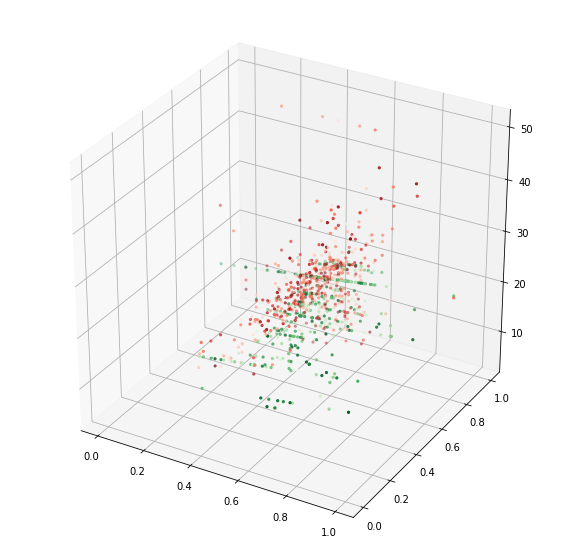

In [13]:
# data 1
n = 506
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50
cmin, cmax = 0, 2

color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data1[:, 0], x_data1[:, 1], y_pred1, c=color, marker='o', s=5, cmap='Greens')
ax.scatter(x_data1[:, 0], x_data1[:, 1], y_data, c=color, marker='o', s=5, cmap='Reds')

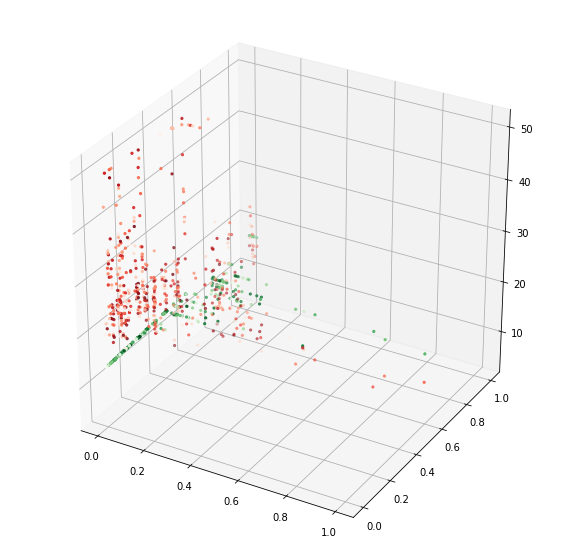

In [14]:
# data 2
n = 506
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50
cmin, cmax = 0, 2

color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data2[:, 0], x_data2[:, 1], y_pred2, c=color, marker='o', s=5, cmap='Greens')
ax.scatter(x_data2[:, 0], x_data2[:, 1], y_data, c=color, marker='o', s=5, cmap='Reds')

## 예측 평면 시각화

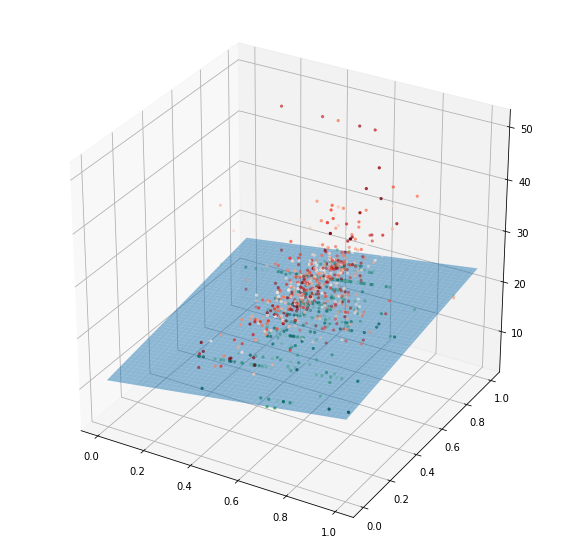

In [15]:

n = 506
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50
cmin, cmax = 0, 2

color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data1[:, 0], x_data1[:, 1], y_data, c=color, marker='o', s=5, cmap='Reds')
ax.scatter(x_data1[:, 0], x_data1[:, 1], y_pred1, c=color, marker='o', s=5, cmap='Greens')

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

X,Y = np.meshgrid(x,y)
Z= slopes1[0]*X + slopes1[1]*Y + b1
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5)

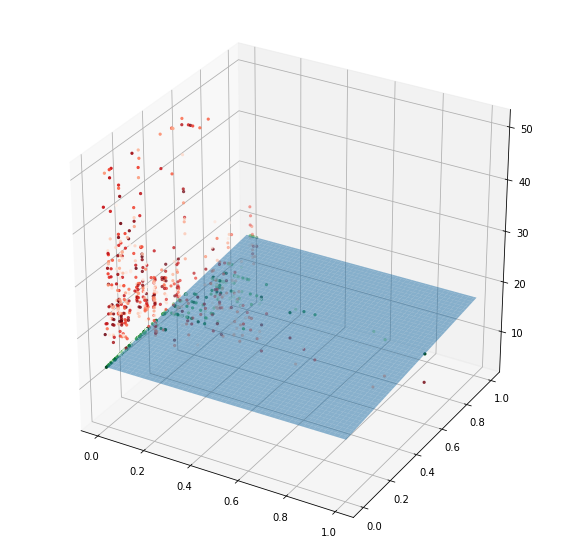

In [16]:
n = 506
xmin, xmax, ymin, ymax, zmin, zmax = 0, 20, 0, 20, 0, 50
cmin, cmax = 0, 2

color = np.array([(cmax - cmin) * np.random.random_sample() + cmin for i in range(n)])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data2[:, 0], x_data2[:, 1], y_data, c=color, marker='o', s=5, cmap='Reds')
ax.scatter(x_data2[:, 0], x_data2[:, 1], y_pred2, c=color, marker='o', s=5, cmap='Greens')

x = np.linspace(0,1,100)
y = np.linspace(0,1,100)

X,Y = np.meshgrid(x,y)
Z= slopes2[0]*X + slopes2[1]*Y + b2
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5)